In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [36]:
ROW_NUM = 1300
TEST_DATA_SIZE = 13

In [37]:
data=pd.read_csv('BTC-USD.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1462 non-null   object 
 1   Open       1459 non-null   float64
 2   High       1459 non-null   float64
 3   Low        1459 non-null   float64
 4   Close      1459 non-null   float64
 5   Adj Close  1459 non-null   float64
 6   Volume     1459 non-null   float64
dtypes: float64(6), object(1)
memory usage: 80.1+ KB
None


In [38]:
data = data.dropna(how='any',axis=0) #remove row containing null value
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1459 non-null   object 
 1   Open       1459 non-null   float64
 2   High       1459 non-null   float64
 3   Low        1459 non-null   float64
 4   Close      1459 non-null   float64
 5   Adj Close  1459 non-null   float64
 6   Volume     1459 non-null   float64
dtypes: float64(6), object(1)
memory usage: 91.2+ KB
None


In [39]:
data=data.iloc[:,1:2]        #second column that contains starting price info
data=data.values

Epoch 1/1000
1300/1300 [==============================] - 1s 927us/step - loss: 0.4061
Epoch 2/1000
1300/1300 [==============================] - 0s 49us/step - loss: 0.3446
Epoch 3/1000
1300/1300 [==============================] - 0s 46us/step - loss: 0.2910
Epoch 4/1000
1300/1300 [==============================] - 0s 47us/step - loss: 0.2449
Epoch 5/1000
1300/1300 [==============================] - 0s 49us/step - loss: 0.2053
Epoch 6/1000
1300/1300 [==============================] - 0s 46us/step - loss: 0.1716
Epoch 7/1000
1300/1300 [==============================] - 0s 47us/step - loss: 0.1430
Epoch 8/1000
1300/1300 [==============================] - 0s 43us/step - loss: 0.1188
Epoch 9/1000
1300/1300 [==============================] - 0s 41us/step - loss: 0.0986
Epoch 10/1000
1300/1300 [==============================] - 0s 39us/step - loss: 0.0815
Epoch 11/1000
1300/1300 [==============================] - 0s 42us/step - loss: 0.0673
Epoch 12/1000
1300/1300 [==========================

1300/1300 [==============================] - 0s 46us/step - loss: 0.0062
Epoch 96/1000
1300/1300 [==============================] - 0s 42us/step - loss: 0.0062
Epoch 97/1000
1300/1300 [==============================] - 0s 44us/step - loss: 0.0061
Epoch 98/1000
1300/1300 [==============================] - 0s 43us/step - loss: 0.0061
Epoch 99/1000
1300/1300 [==============================] - 0s 45us/step - loss: 0.0061
Epoch 100/1000
1300/1300 [==============================] - 0s 46us/step - loss: 0.0061
Epoch 101/1000
1300/1300 [==============================] - 0s 49us/step - loss: 0.0061
Epoch 102/1000
1300/1300 [==============================] - 0s 50us/step - loss: 0.0061
Epoch 103/1000
1300/1300 [==============================] - 0s 42us/step - loss: 0.0061
Epoch 104/1000
1300/1300 [==============================] - 0s 40us/step - loss: 0.0061
Epoch 105/1000
1300/1300 [==============================] - 0s 41us/step - loss: 0.0061
Epoch 106/1000
1300/1300 [=========================

1300/1300 [==============================] - 0s 39us/step - loss: 0.0043
Epoch 189/1000
1300/1300 [==============================] - 0s 44us/step - loss: 0.0043
Epoch 190/1000
1300/1300 [==============================] - 0s 43us/step - loss: 0.0043
Epoch 191/1000
1300/1300 [==============================] - 0s 44us/step - loss: 0.0042
Epoch 192/1000
1300/1300 [==============================] - 0s 42us/step - loss: 0.0042
Epoch 193/1000
1300/1300 [==============================] - 0s 42us/step - loss: 0.0041
Epoch 194/1000
1300/1300 [==============================] - 0s 47us/step - loss: 0.0041
Epoch 195/1000
1300/1300 [==============================] - 0s 56us/step - loss: 0.0040
Epoch 196/1000
1300/1300 [==============================] - 0s 56us/step - loss: 0.0040
Epoch 197/1000
1300/1300 [==============================] - 0s 44us/step - loss: 0.0040
Epoch 198/1000
1300/1300 [==============================] - 0s 44us/step - loss: 0.0039
Epoch 199/1000
1300/1300 [=====================

1300/1300 [==============================] - 0s 42us/step - loss: 2.1356e-04
Epoch 280/1000
1300/1300 [==============================] - 0s 41us/step - loss: 2.0375e-04
Epoch 281/1000
1300/1300 [==============================] - 0s 45us/step - loss: 1.9276e-04
Epoch 282/1000
1300/1300 [==============================] - 0s 48us/step - loss: 1.8355e-04
Epoch 283/1000
1300/1300 [==============================] - 0s 39us/step - loss: 1.7557e-04
Epoch 284/1000
1300/1300 [==============================] - 0s 40us/step - loss: 1.6773e-04
Epoch 285/1000
1300/1300 [==============================] - 0s 39us/step - loss: 1.6052e-04
Epoch 286/1000
1300/1300 [==============================] - 0s 39us/step - loss: 1.5439e-04
Epoch 287/1000
1300/1300 [==============================] - 0s 40us/step - loss: 1.4844e-04
Epoch 288/1000
1300/1300 [==============================] - 0s 38us/step - loss: 1.4316e-04
Epoch 289/1000
1300/1300 [==============================] - 0s 38us/step - loss: 1.3797e-04
Epo

1300/1300 [==============================] - 0s 41us/step - loss: 9.2193e-05
Epoch 369/1000
1300/1300 [==============================] - 0s 40us/step - loss: 9.2724e-05
Epoch 370/1000
1300/1300 [==============================] - 0s 40us/step - loss: 9.2236e-05
Epoch 371/1000
1300/1300 [==============================] - 0s 41us/step - loss: 9.2316e-05
Epoch 372/1000
1300/1300 [==============================] - 0s 41us/step - loss: 9.1946e-05
Epoch 373/1000
1300/1300 [==============================] - 0s 40us/step - loss: 9.2035e-05
Epoch 374/1000
1300/1300 [==============================] - 0s 39us/step - loss: 9.2006e-05
Epoch 375/1000
1300/1300 [==============================] - 0s 39us/step - loss: 9.1954e-05
Epoch 376/1000
1300/1300 [==============================] - 0s 40us/step - loss: 9.2047e-05
Epoch 377/1000
1300/1300 [==============================] - 0s 41us/step - loss: 9.2836e-05
Epoch 378/1000
1300/1300 [==============================] - 0s 39us/step - loss: 9.1550e-05
Epo

1300/1300 [==============================] - 0s 44us/step - loss: 8.9893e-05
Epoch 458/1000
1300/1300 [==============================] - 0s 47us/step - loss: 8.9812e-05
Epoch 459/1000
1300/1300 [==============================] - 0s 40us/step - loss: 8.9402e-05
Epoch 460/1000
1300/1300 [==============================] - 0s 39us/step - loss: 8.9736e-05
Epoch 461/1000
1300/1300 [==============================] - 0s 38us/step - loss: 9.1635e-05
Epoch 462/1000
1300/1300 [==============================] - 0s 36us/step - loss: 9.1881e-05
Epoch 463/1000
1300/1300 [==============================] - 0s 39us/step - loss: 8.9386e-05
Epoch 464/1000
1300/1300 [==============================] - 0s 37us/step - loss: 8.9641e-05
Epoch 465/1000
1300/1300 [==============================] - 0s 37us/step - loss: 8.9451e-05
Epoch 466/1000
1300/1300 [==============================] - 0s 38us/step - loss: 8.9278e-05
Epoch 467/1000
1300/1300 [==============================] - 0s 39us/step - loss: 8.9157e-05
Epo

1300/1300 [==============================] - 0s 38us/step - loss: 8.7910e-05
Epoch 547/1000
1300/1300 [==============================] - 0s 47us/step - loss: 8.8960e-05
Epoch 548/1000
1300/1300 [==============================] - 0s 35us/step - loss: 8.8953e-05
Epoch 549/1000
1300/1300 [==============================] - 0s 37us/step - loss: 8.7409e-05
Epoch 550/1000
1300/1300 [==============================] - 0s 40us/step - loss: 8.6967e-05
Epoch 551/1000
1300/1300 [==============================] - 0s 38us/step - loss: 8.7112e-05
Epoch 552/1000
1300/1300 [==============================] - 0s 41us/step - loss: 8.8799e-05
Epoch 553/1000
1300/1300 [==============================] - 0s 40us/step - loss: 8.8156e-05
Epoch 554/1000
1300/1300 [==============================] - 0s 39us/step - loss: 8.7006e-05
Epoch 555/1000
1300/1300 [==============================] - 0s 42us/step - loss: 8.7405e-05
Epoch 556/1000
1300/1300 [==============================] - 0s 45us/step - loss: 8.7265e-05
Epo

1300/1300 [==============================] - 0s 38us/step - loss: 8.5991e-05
Epoch 636/1000
1300/1300 [==============================] - 0s 38us/step - loss: 8.6123e-05
Epoch 637/1000
1300/1300 [==============================] - 0s 38us/step - loss: 8.6910e-05
Epoch 638/1000
1300/1300 [==============================] - 0s 40us/step - loss: 8.7449e-05
Epoch 639/1000
1300/1300 [==============================] - 0s 39us/step - loss: 8.5524e-05
Epoch 640/1000
1300/1300 [==============================] - 0s 41us/step - loss: 8.7620e-05
Epoch 641/1000
1300/1300 [==============================] - 0s 41us/step - loss: 8.6051e-05
Epoch 642/1000
1300/1300 [==============================] - 0s 40us/step - loss: 8.6099e-05
Epoch 643/1000
1300/1300 [==============================] - 0s 42us/step - loss: 8.6442e-05
Epoch 644/1000
1300/1300 [==============================] - 0s 45us/step - loss: 8.5625e-05
Epoch 645/1000
1300/1300 [==============================] - 0s 40us/step - loss: 8.5600e-05
Epo

1300/1300 [==============================] - 0s 38us/step - loss: 8.4850e-05
Epoch 725/1000
1300/1300 [==============================] - 0s 39us/step - loss: 8.5232e-05
Epoch 726/1000
1300/1300 [==============================] - 0s 39us/step - loss: 8.5827e-05
Epoch 727/1000
1300/1300 [==============================] - 0s 38us/step - loss: 8.6908e-05
Epoch 728/1000
1300/1300 [==============================] - 0s 48us/step - loss: 8.5959e-05
Epoch 729/1000
1300/1300 [==============================] - 0s 45us/step - loss: 8.5330e-05
Epoch 730/1000
1300/1300 [==============================] - 0s 43us/step - loss: 8.5896e-05
Epoch 731/1000
1300/1300 [==============================] - 0s 41us/step - loss: 8.4825e-05
Epoch 732/1000
1300/1300 [==============================] - 0s 38us/step - loss: 8.5082e-05
Epoch 733/1000
1300/1300 [==============================] - 0s 36us/step - loss: 8.4678e-05
Epoch 734/1000
1300/1300 [==============================] - 0s 38us/step - loss: 8.5699e-05
Epo

1300/1300 [==============================] - 0s 46us/step - loss: 8.4162e-05
Epoch 814/1000
1300/1300 [==============================] - 0s 46us/step - loss: 8.4224e-05
Epoch 815/1000
1300/1300 [==============================] - 0s 46us/step - loss: 8.4555e-05
Epoch 816/1000
1300/1300 [==============================] - 0s 46us/step - loss: 8.7319e-05
Epoch 817/1000
1300/1300 [==============================] - 0s 48us/step - loss: 8.5398e-05
Epoch 818/1000
1300/1300 [==============================] - 0s 47us/step - loss: 8.4710e-05
Epoch 819/1000
1300/1300 [==============================] - 0s 44us/step - loss: 8.4362e-05
Epoch 820/1000
1300/1300 [==============================] - 0s 45us/step - loss: 8.5568e-05
Epoch 821/1000
1300/1300 [==============================] - 0s 44us/step - loss: 8.4660e-05
Epoch 822/1000
1300/1300 [==============================] - 0s 45us/step - loss: 8.4783e-05
Epoch 823/1000
1300/1300 [==============================] - 0s 41us/step - loss: 8.4459e-05
Epo

1300/1300 [==============================] - 0s 46us/step - loss: 8.6542e-05
Epoch 903/1000
1300/1300 [==============================] - 0s 44us/step - loss: 8.5483e-05
Epoch 904/1000
1300/1300 [==============================] - 0s 42us/step - loss: 8.4970e-05
Epoch 905/1000
1300/1300 [==============================] - 0s 44us/step - loss: 8.5754e-05
Epoch 906/1000
1300/1300 [==============================] - 0s 46us/step - loss: 8.5020e-05
Epoch 907/1000
1300/1300 [==============================] - 0s 40us/step - loss: 8.4587e-05
Epoch 908/1000
1300/1300 [==============================] - 0s 45us/step - loss: 8.3907e-05
Epoch 909/1000
1300/1300 [==============================] - 0s 41us/step - loss: 8.5983e-05
Epoch 910/1000
1300/1300 [==============================] - 0s 42us/step - loss: 8.5585e-05
Epoch 911/1000
1300/1300 [==============================] - 0s 40us/step - loss: 8.4709e-05
Epoch 912/1000
1300/1300 [==============================] - 0s 48us/step - loss: 8.4151e-05
Epo

1300/1300 [==============================] - 0s 47us/step - loss: 8.3706e-05
Epoch 992/1000
1300/1300 [==============================] - 0s 49us/step - loss: 8.4053e-05
Epoch 993/1000
1300/1300 [==============================] - 0s 49us/step - loss: 8.5590e-05
Epoch 994/1000
1300/1300 [==============================] - 0s 51us/step - loss: 8.4255e-05
Epoch 995/1000
1300/1300 [==============================] - 0s 51us/step - loss: 8.6170e-05
Epoch 996/1000
1300/1300 [==============================] - 0s 51us/step - loss: 8.4372e-05
Epoch 997/1000
1300/1300 [==============================] - 0s 45us/step - loss: 8.3919e-05
Epoch 998/1000
1300/1300 [==============================] - 0s 44us/step - loss: 8.6272e-05
Epoch 999/1000
1300/1300 [==============================] - 0s 46us/step - loss: 8.3815e-05
Epoch 1000/1000
1300/1300 [==============================] - 0s 44us/step - loss: 8.3867e-05


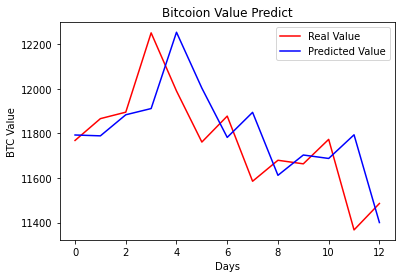

In [40]:
ytest=data[ROW_NUM+1:ROW_NUM+TEST_DATA_SIZE+1]
#Scaling the data
sc = MinMaxScaler() 
data = sc.fit_transform(data)
xtrain=data[0:ROW_NUM]          
ytrain=data[1:ROW_NUM+1]
xtest=data[ROW_NUM:ROW_NUM+TEST_DATA_SIZE]

xtrain = np.reshape(xtrain, (ROW_NUM, 1, 1)) #Reshaping

regressor=Sequential()                                                      #initialize RNN
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))      #adding input layerand the LSTM layer 
regressor.add(Dense(units=1))                                               #adding output layers
regressor.compile(optimizer='adam',loss='mean_squared_error')               #compiling the RNN
regressor.fit(xtrain,ytrain,batch_size=64,epochs=1000)                      #fitting the RNN to the training set  
           
xtest = np.reshape(xtest, (TEST_DATA_SIZE, 1, 1))
predicted_price = regressor.predict(xtest)
predicted_price = sc.inverse_transform(predicted_price)

plt.plot(ytest, color = 'red', label = 'Real Value')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Value')
plt.title('Bitcoion Value Predict')
plt.xlabel('Days')
plt.ylabel('BTC Value')
plt.legend()
plt.show()